In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Movie Analysis - Treehouse Data Analysis Unit 8

In [452]:
sns.set_palette("Set2")

In [342]:
movies = pd.read_csv('movies.csv')

In [344]:
# Convert released date to string
movies['Released'] = pd.to_datetime(movies['Released'], format='%Y-%m-%d')
# movies.info()

## Question 1
What was the runtime for each movie?

**Answer:** The graph below shows that each movie's runtime is roughly in the range of 100 to 140 minutes.

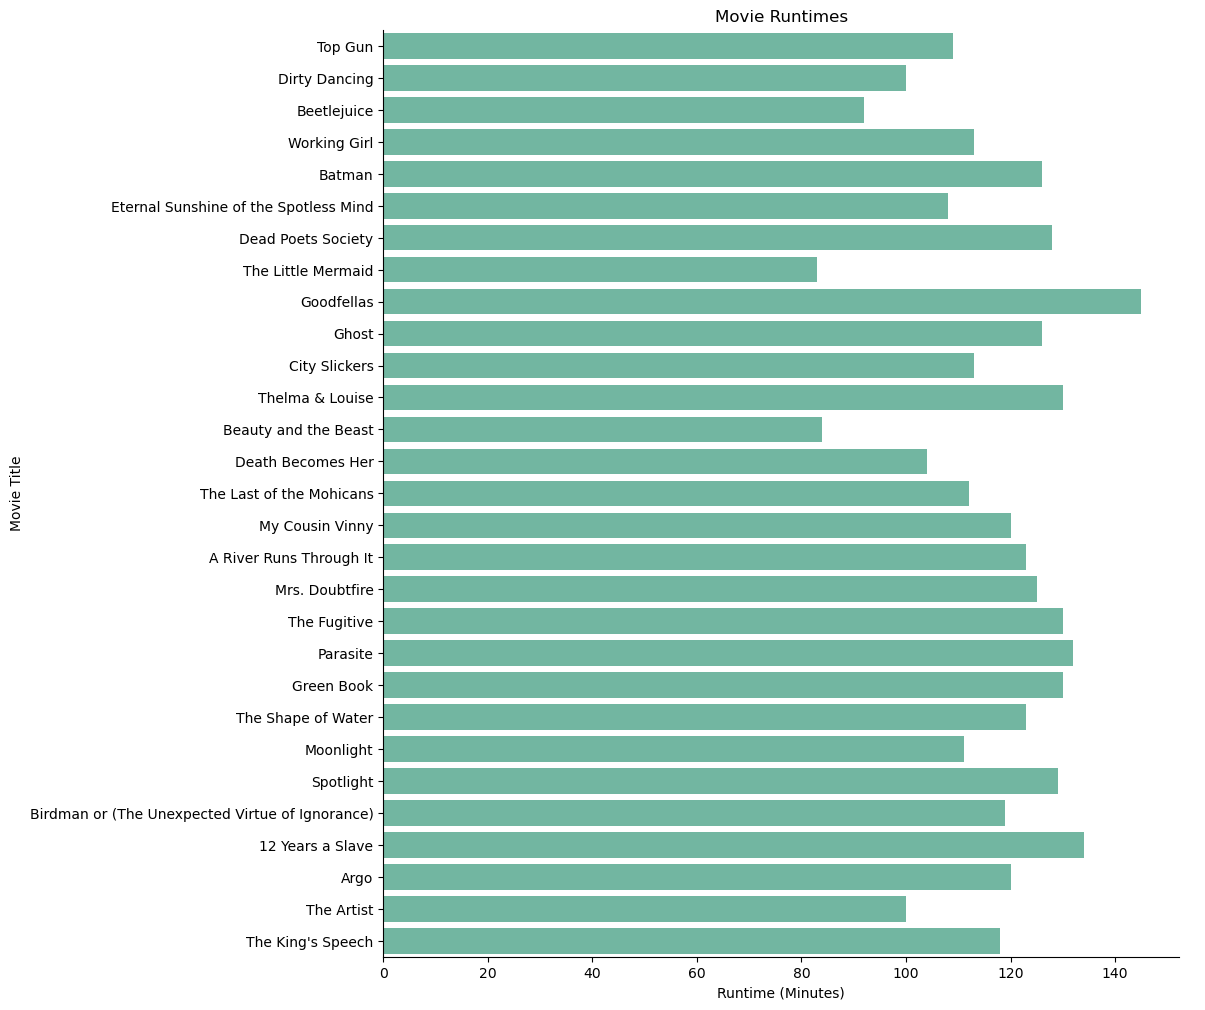

In [434]:
sns.catplot(data=movies, kind='bar', x='Runtime', y='Title', height=10, aspect=1.2)
plt.locator_params(axis='x', nbins=10)
plt.title('Movie Runtimes')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Movie Title')
plt.savefig('movie_runtimes.png')

## Question 2
What movie had the longest runtime?

**Answer:** Oppenheimer

Reviewing the graph above, it is clear that Oppenheimer's runtime is much longer than any other movies in the dataframe, with a runtime of 180+ minutes.

## Question 3
Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?

**Answer:** There isn't really a correlation between awards won and runtime, whether you look at Oscars vs. Runtime (Graph 1 below) or total Awards won vs. Runtime (Graph 2 below)

This was determined by plotting the number of Oscars won and the Runtime for each movie in the data set, and then plotting the number of Awards won and the Runtime for each movie. Examining the resulting scatter plots shows that both long and short movies win oscars and plenty of other awards.

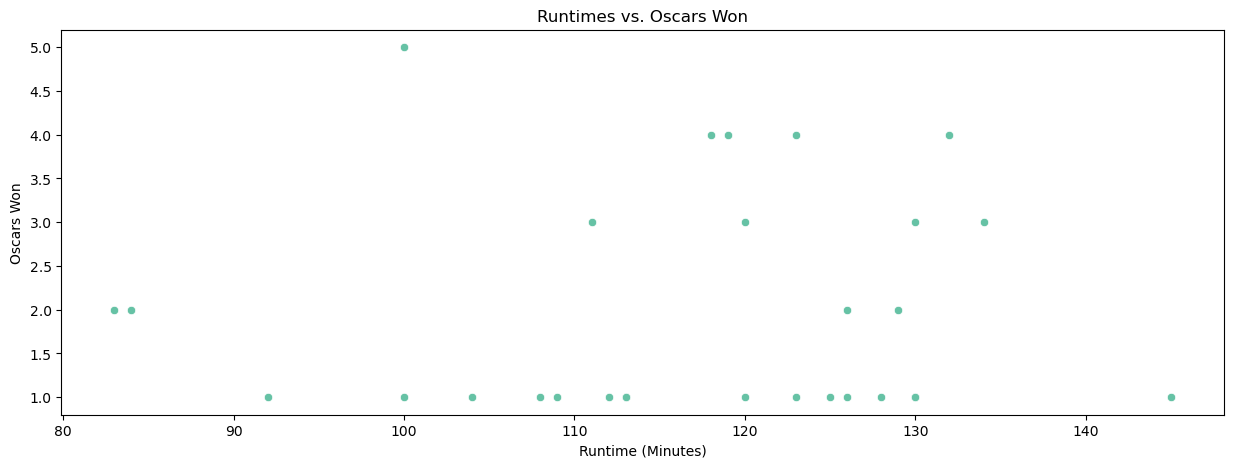

In [436]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=movies, x='Runtime', y='Oscars')
plt.locator_params(axis='x', nbins=10)
plt.title('Runtimes vs. Oscars Won')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Oscars Won')
plt.savefig('runtime_vs_oscars.png')

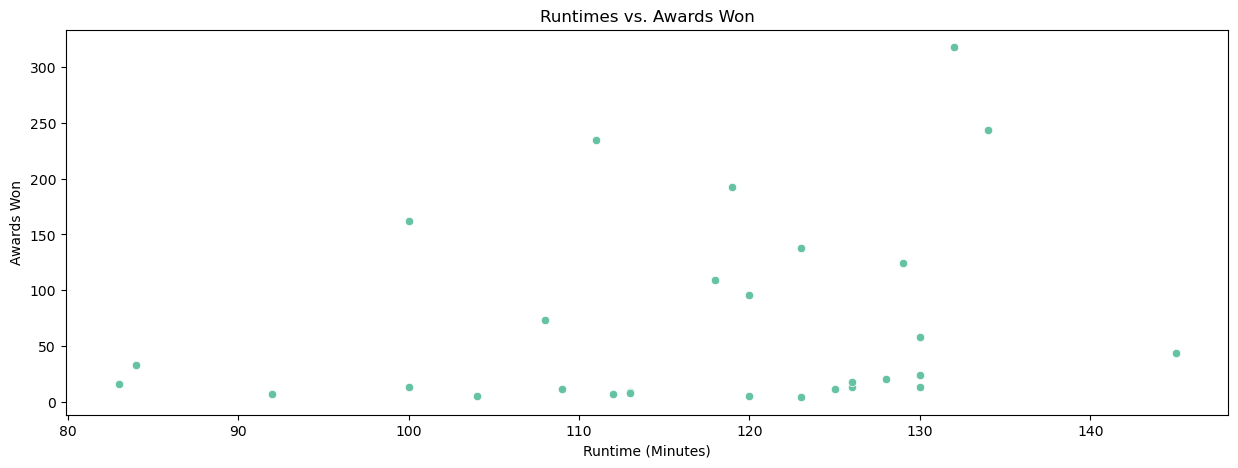

In [438]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=movies, x='Runtime', y='Award_Wins')
plt.locator_params(axis='x', nbins=10)
plt.title('Runtimes vs. Awards Won')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Awards Won')
plt.savefig('runtime_vs_wins.png')

## Question 4
How many awards and nominations did each movie receive?

**Answer:** The graph below shows the total award nominations for each movie in the data set. Total Nominations was calculated by adding the number of awards won + the number of nominations. The bar chart below easily lets you scan to see the approximate number of total nominations for each movie. 

_Note: The movies I added to the data set are mostly older movies. Those movies have much fewer nominations, which is likely due (in some part) to the growing number of awards available today compared to 30 years ago._

In [352]:
# Add column totaling wins + nominations
movies['Total_Nominations'] = movies['Award_Wins'] + movies['Award_Nominations']

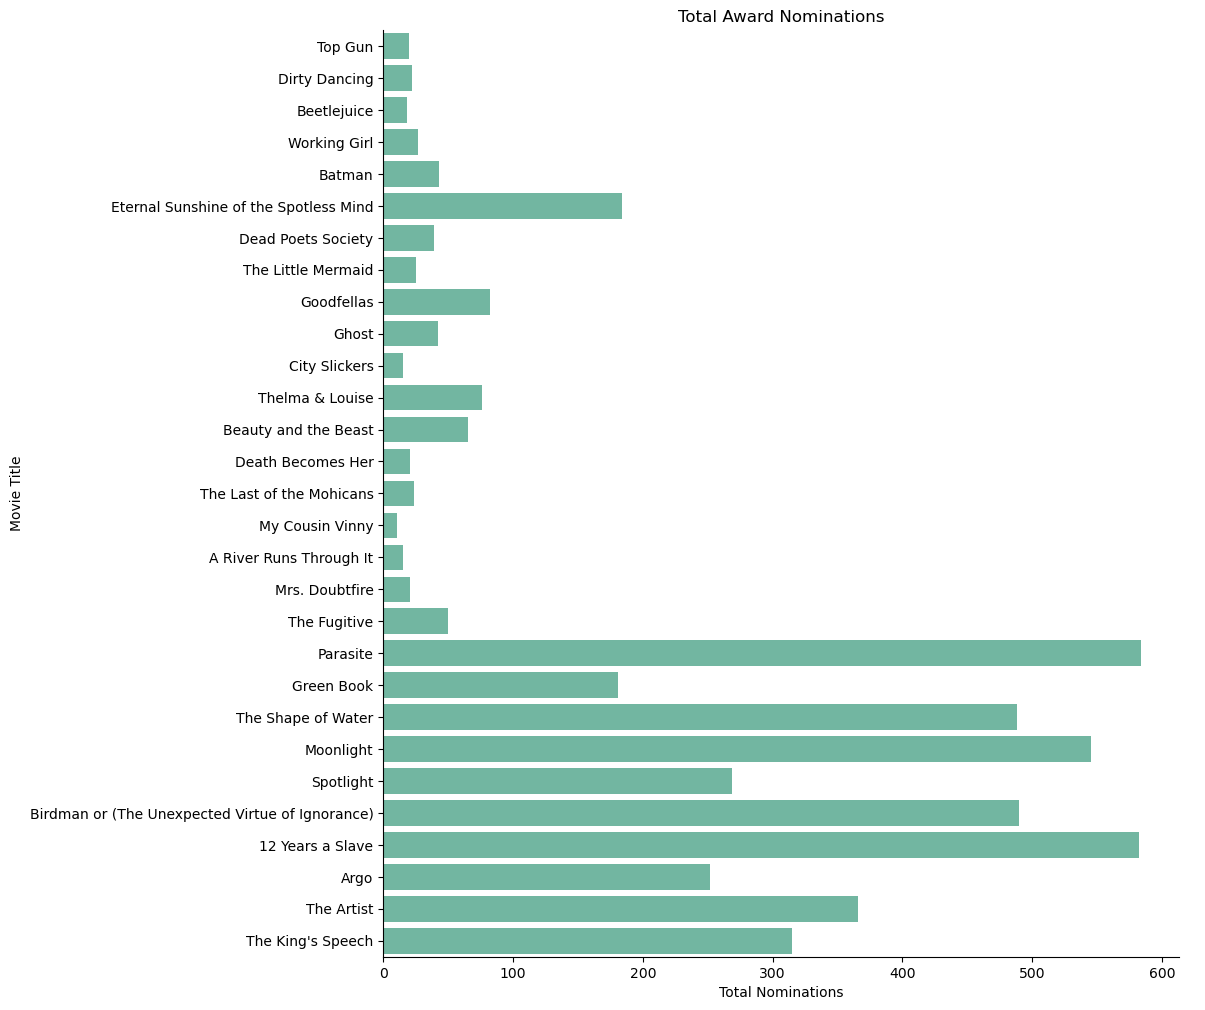

In [440]:
sns.catplot(data=movies, kind='bar', x='Total_Nominations', y='Title', height=10, aspect=1.2)
plt.locator_params(axis='x', nbins=10)
plt.title('Total Award Nominations')
plt.xlabel('Total Nominations')
plt.ylabel('Movie Title')
plt.savefig('total_nominations.png')

## Extra Credit 1
Is there a relationship between the amount of box office earnings a movie had and the amount of total nominations the movie received?

**Answer:** There is not really a correlation between Award Nominations and Box Office. While movies in the DataFrame that earned more than \\$1.5 million had fewer total nominations, there are just as many that earned less than \\$1.25 million that had fewer nominations.

This was determined by plotting the total number of Award Nominations (wins + nominations) and Box Office earnings for each movie in the data set, and then examining the resulting scatter plot. 

_Note: This data is likely skewed since there is a pattern of older movies having much fewer total nominations. I'd guess the number of awards available today compared to 30 years ago is quite different._

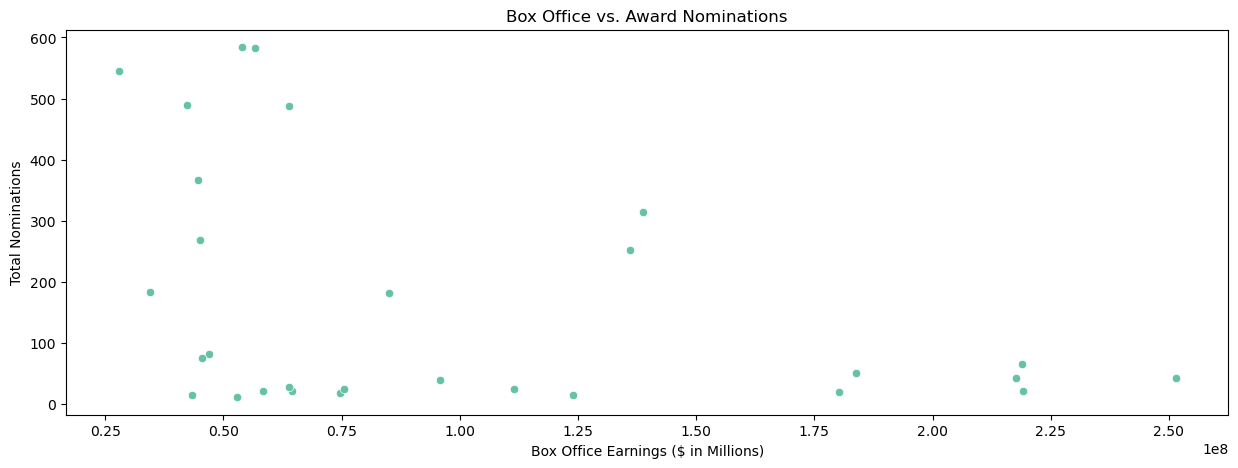

In [442]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=movies, x='Box_Office', y='Total_Nominations')
plt.locator_params(axis='x', nbins=10)
plt.title('Box Office vs. Award Nominations')
plt.xlabel('Box Office Earnings ($ in Millions)')
plt.ylabel('Total Nominations')
plt.savefig('boxOffice_vs_nominations.png')

## Extra Credit 2
Is there a relationship between box office earnings and movie runtimes?

**Answer:** No, there isn't a correlation between Runtime and Box Office. This was determined by plotting the Runtime and Box Office for each movie in the DataFrame and examining the resulting scatter plot.

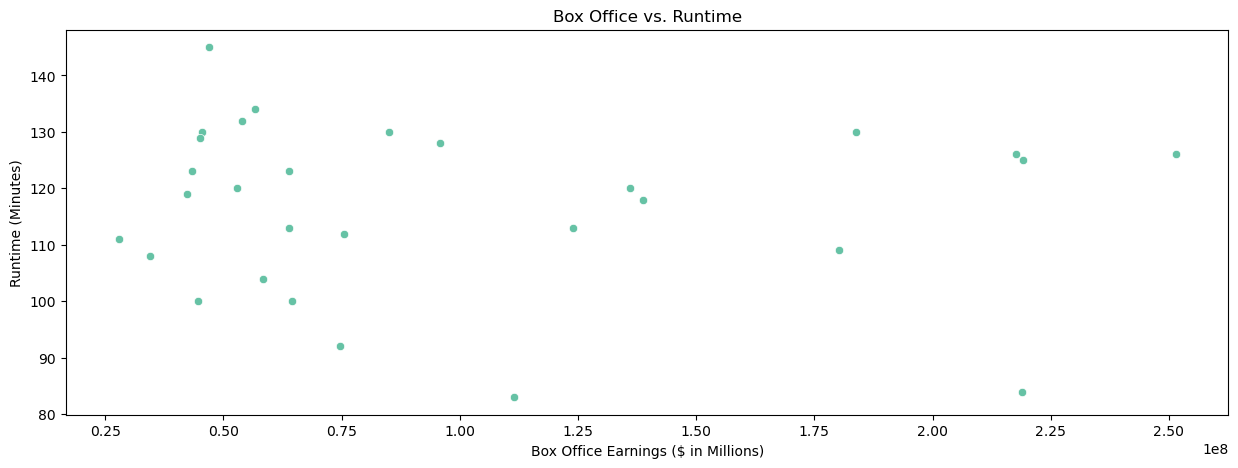

In [444]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=movies, x='Box_Office', y='Runtime')
plt.locator_params(axis='x', nbins=10)
plt.title('Box Office vs. Runtime')
plt.xlabel('Box Office Earnings ($ in Millions)')
plt.ylabel('Runtime (Minutes)')
plt.savefig('boxOffice_vs_runtime.png')

## Extra Credit 3
How much did each movie earn at the box office?

**Answer:** The graph below shows the total box office earnings for each movie in the dataframe. Earnings range from \\$250,000 to \\$2.5 million.

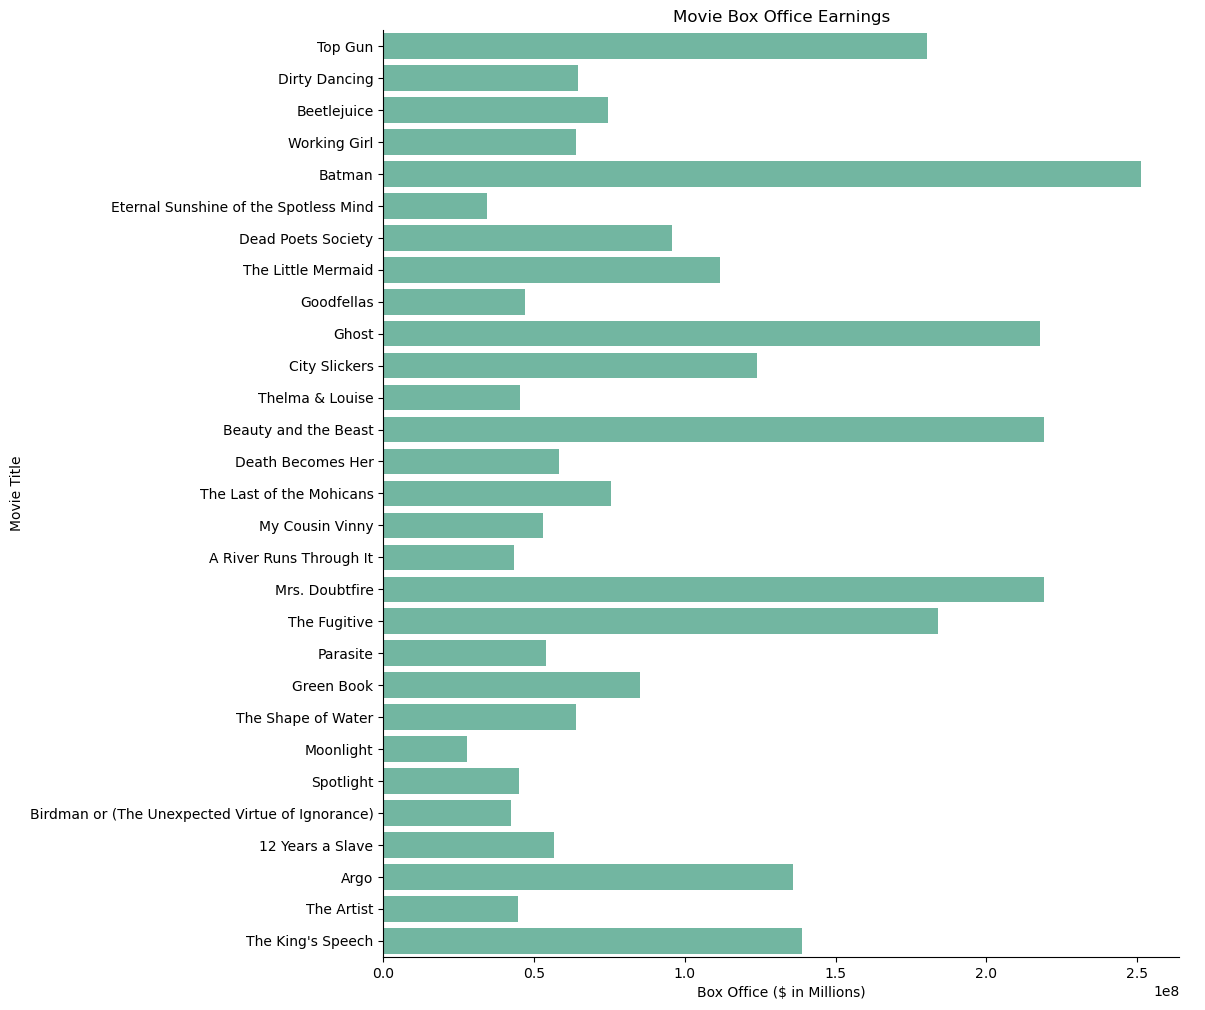

In [446]:
sns.catplot(data=movies, kind='bar', x='Box_Office', y='Title', height=10, aspect=1.2)
plt.locator_params(axis='x', nbins=10)
plt.title('Movie Box Office Earnings')
plt.xlabel('Box Office ($ in Millions)')
plt.ylabel('Movie Title')
plt.savefig('boxOffice.png')

## Extra Credit 4
What is the total count of each genre present in the dataset? (how many times does fantasy, drama, adventure, etc. show up)

**Answer:** 
- 	Action: 4
-	Drama: 22
-	Music: 1
-	Romance: 6
-	Comedy: 10
-	Fantasy: 5
-	Adventure: 4
-	Sci-Fi: 1
-	Animation: 2
-	Family: 2
-	Biography: 6
-	Crime: 5
-	Western: 1
-	Horror: 1
-	Thriller: 1
-	History: 3

To get the totals, I first got a list of all the unique generes from the movies DataFrame. I then created an empty array to hold the count of each genre. For each genres listed in unique_genres, I got the sum of how many times that genre appeared in the 'Genre' column. Once I had the array of counts, I made a new DataFrame (genres) out of the unique_genres array and then added the count values as a new 'Count' column to the genres DataFrame.

In [362]:
# Get array of unique genres from the movies DataFrame
unique_genres = movies['Genre'].str.split(', ').explode().unique()

In [364]:
# empty array to hold count for each genre
counts = []

# loop through unique genres to get a total count (how many times the word appeared in the 'Genre' column of movies) and append that count to 'counts'
for genre in unique_genres:
    count = movies['Genre'].str.count(genre).sum()
    counts.append(count)

# turn unique genres into a new DataFrame called 'genres'
genres = pd.DataFrame(unique_genres, columns=['Name'])

# add 'count' column to genres DataFrame and populate the values with the count array
genres['Count'] = counts
#genres

In [402]:
# To Do: look to see what patterns emerge when comparing things like box office, total nominations, and runtime across years.

In [406]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              29 non-null     object        
 1   Year               29 non-null     int64         
 2   Rated              29 non-null     object        
 3   Released           29 non-null     datetime64[ns]
 4   Runtime            29 non-null     int64         
 5   Genre              29 non-null     object        
 6   Actors             29 non-null     object        
 7   Oscars             29 non-null     int64         
 8   Award_Wins         29 non-null     int64         
 9   Award_Nominations  29 non-null     int64         
 10  Box_Office         29 non-null     int64         
 11  Total_Nominations  29 non-null     int64         
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 2.8+ KB
